# About Dataset

The Spaceship Titanic case study involves analyzing passenger data from the famous interstellar cruise liner, Spaceship Titanic. The goal is to build Logistic Regression model that can accurately identify passengers who are likely to have been transported to their destination based on various features and amenities provided during the voyage. This analysis is crucial for understanding the factors that contribute to successful transportation and enhancing the overall passenger experience on future interstellar journeys.

# Datafields description

1. PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates
a group the passenger is travelling with and pp is their number within the group. People in a group are
often family members, but not always.
2. HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
3. CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the
duration of the voyage. Passengers in cryosleep are confined to their cabins.
4. Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side
can be either P for Port or S for Starboard.
5. Destination - The planet the passenger will be debarking to.
6. Age - The age of the passenger.
7. VIP - Whether the passenger has paid for special VIP service during the voyage.
8. RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of
the Spaceship Titanic's many luxury amenities.
9. Name - The first and last names of the passenger.
10. Transported - Whether the passenger was transported to another dimension. This is the target, the
column you are trying to predict.


# Importing the libraries

In [23]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [26]:
train_dataset=pd.read_csv('spaceship_titanic_train.csv')
test_dataset=pd.read_csv('spaceship_titanic_test.csv')

In [27]:
train_dataset.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [28]:
test_dataset.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# Preprocessing and EDA

1. Checking for Duplicates

In [29]:
train_dataset.duplicated().sum()

0

In [30]:
test_dataset.duplicated().sum()


0

In [32]:
train_dataset['Transported']=train_dataset['Transported'].astype('int')

In [33]:
train_dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


There are no duplicates in the input data

# 2. Merging the train and test dataset to do preprocessing together.

In [34]:
train_dataset['data']='train'

In [35]:
test_dataset['data']='test'

In [36]:
train_dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,data
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,train
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,train
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,train
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,train
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,train


In [37]:
test_dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,data
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,test
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,test
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,test
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,test
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,test


In [38]:
all_data=pd.concat([train_dataset,test_dataset], axis=0)

In [39]:
all_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,data
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,train
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,train
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,train
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,train
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,train


In [40]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   float64
 14  data          12970 non-null  object 
dtypes: float64(7), object(8)
memory usage: 1.6+ MB


In [41]:
all_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000,8693.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482,0.503624
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000,1.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


# 3. Analysing the distribution of numerical columns

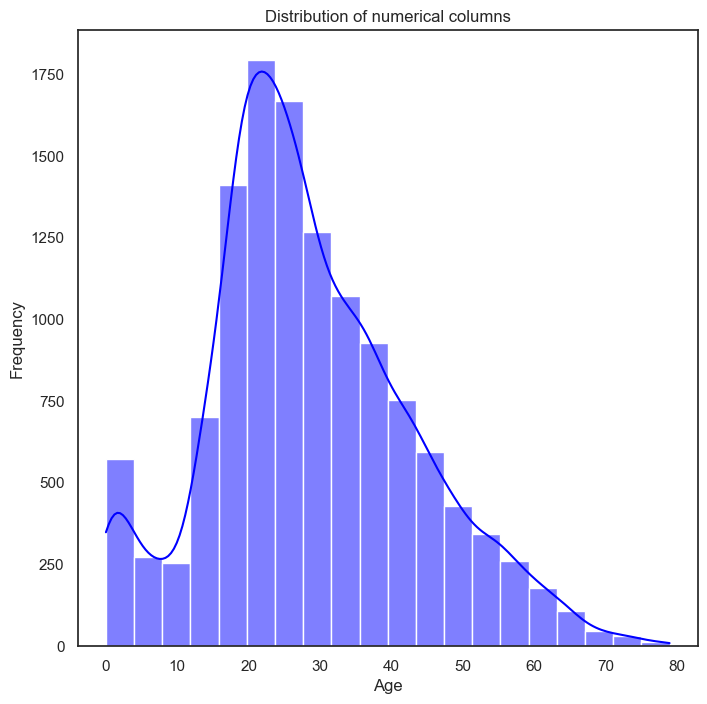

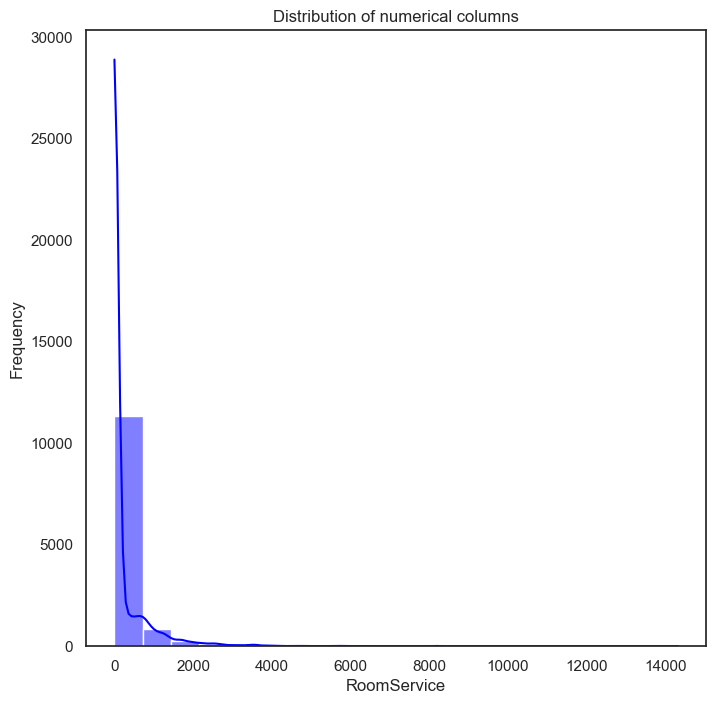

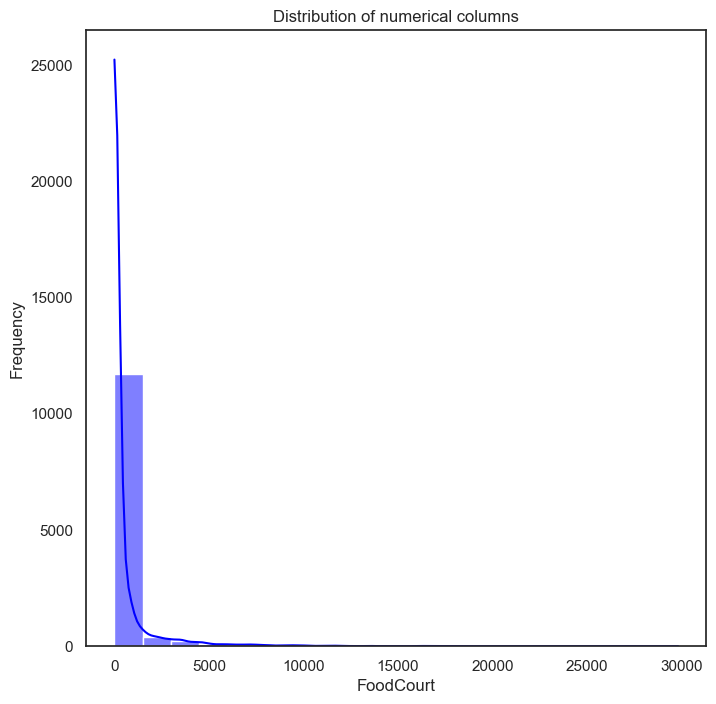

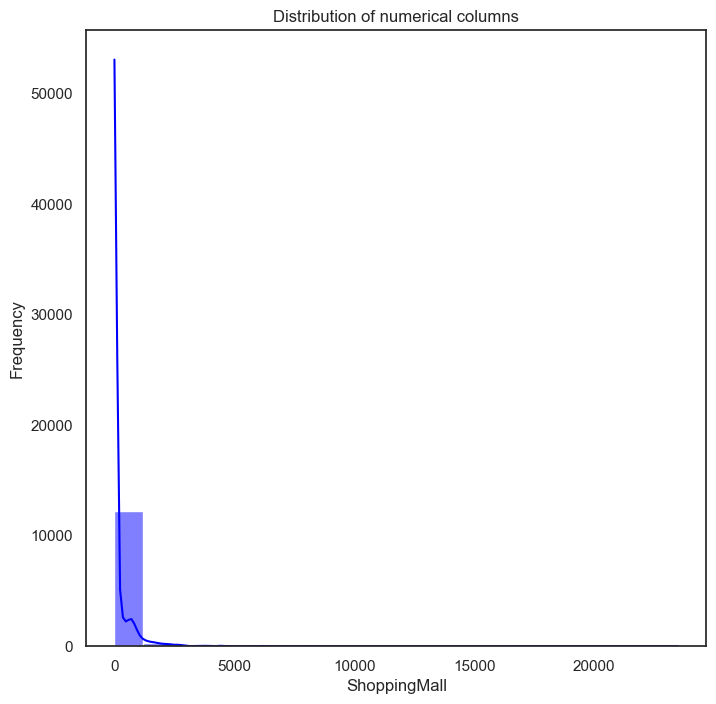

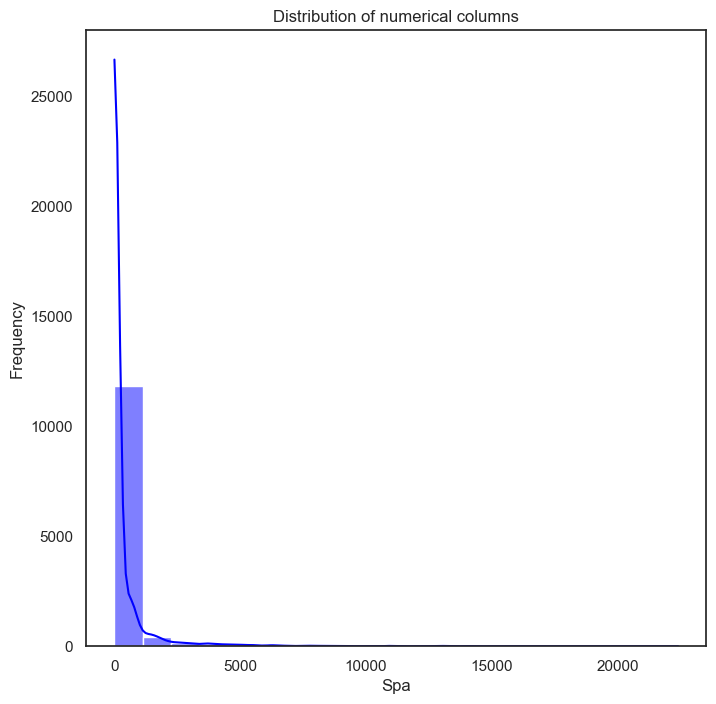

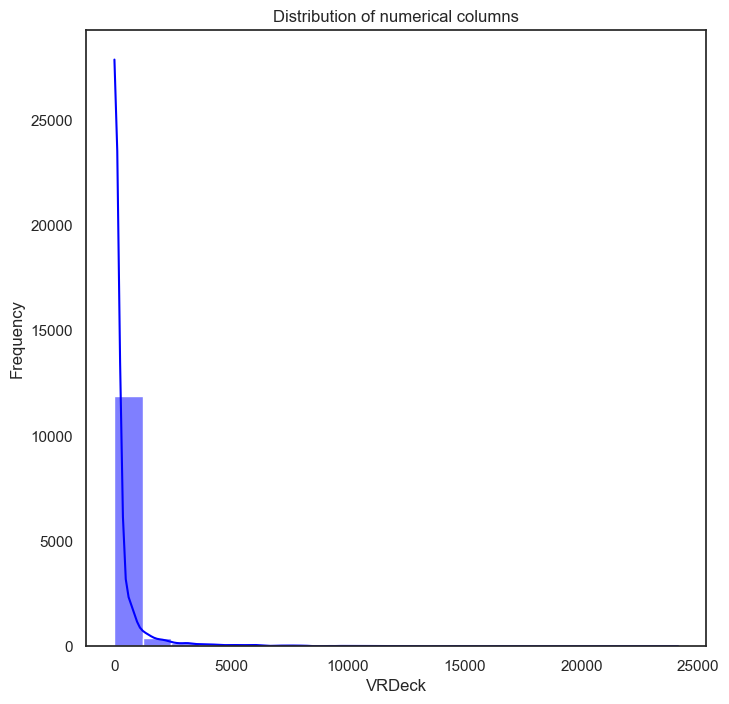

In [42]:
num_cols=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for i in num_cols:
    plt.figure(figsize=[8,8])
    sns.set_theme(style='white')
    sns.histplot(all_data[i],kde=True, bins=20, color='blue')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title('Distribution of numerical columns')
    plt.show()

In [43]:
train_dataset.shape

(8693, 15)

In [45]:
test_dataset.shape

(4277, 14)

In [46]:
all_data.shape

(12970, 15)

# 4. Dropping the columns PassengerID, Name columns

In [56]:
all_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,data,Deck,Cabin_num,Side
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0.0,train,B,0,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1.0,train,F,0,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0.0,train,A,0,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0.0,train,A,0,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1.0,train,F,1,S


# 5. Splitting the Cabin column into 3 and dropping original cabin column

In [57]:
all_data[['Deck', 'Cabin_num', 'Side']]=all_data['Cabin'].str.split("/", expand=True)

In [58]:
all_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,data,Deck,Cabin_num,Side
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0.0,train,B,0,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1.0,train,F,0,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0.0,train,A,0,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0.0,train,A,0,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1.0,train,F,1,S


In [59]:
all_data=all_data.drop(['Cabin'], axis=1)

In [60]:
all_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,data,Deck,Cabin_num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0.0,train,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1.0,train,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0.0,train,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0.0,train,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1.0,train,F,1,S


In [61]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12682 non-null  object 
 1   CryoSleep     12660 non-null  object 
 2   Destination   12696 non-null  object 
 3   Age           12700 non-null  float64
 4   VIP           12674 non-null  object 
 5   RoomService   12707 non-null  float64
 6   FoodCourt     12681 non-null  float64
 7   ShoppingMall  12664 non-null  float64
 8   Spa           12686 non-null  float64
 9   VRDeck        12702 non-null  float64
 10  Transported   8693 non-null   float64
 11  data          12970 non-null  object 
 12  Deck          12671 non-null  object 
 13  Cabin_num     12671 non-null  object 
 14  Side          12671 non-null  object 
dtypes: float64(7), object(8)
memory usage: 1.6+ MB


In [62]:
all_data=all_data.drop(['Cabin_num'], axis=1)

In [63]:
all_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,data,Deck,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0.0,train,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1.0,train,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0.0,train,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0.0,train,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1.0,train,F,S


# 6. Checking for null values

In [64]:
all_data.isnull().sum()

HomePlanet       288
CryoSleep        310
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Transported     4277
data               0
Deck             299
Side             299
dtype: int64

In [65]:
all_data.isnull().sum()/len(all_data)*100

HomePlanet       2.220509
CryoSleep        2.390131
Destination      2.112567
Age              2.081727
VIP              2.282190
RoomService      2.027756
FoodCourt        2.228219
ShoppingMall     2.359291
Spa              2.189668
VRDeck           2.066307
Transported     32.976099
data             0.000000
Deck             2.305320
Side             2.305320
dtype: float64

we need to impute all the null value columns except dependent variable 'Transported' as % of null values below 25%

## Handling null values for categorical and numerical columns

In [66]:
categorical_columns=all_data.select_dtypes(exclude='float64')
numerical_columns=all_data.select_dtypes(exclude='object')
numerical_columns=numerical_columns.drop(['Transported'],axis=1)


for i in numerical_columns.columns:
    numerical_columns[i]=numerical_columns[i].fillna(numerical_columns[i].median())
    
for j in categorical_columns.columns:
    categorical_columns[j]=categorical_columns[j].fillna(categorical_columns[j].mode()[0])

In [67]:
numerical_columns.isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [68]:
categorical_columns.isnull().sum()

HomePlanet     0
CryoSleep      0
Destination    0
VIP            0
data           0
Deck           0
Side           0
dtype: int64

In [69]:
all_data[['HomePlanet', 'CryoSleep', 'Destination', 'VIP','Deck', 'Side']]=categorical_columns[['HomePlanet', 'CryoSleep', 'Destination', 'VIP','Deck', 'Side']]

In [70]:
all_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall','Spa', 'VRDeck']]=numerical_columns[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall','Spa', 'VRDeck']]

In [71]:
all_data.isnull().sum()

HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Transported     4277
data               0
Deck               0
Side               0
dtype: int64

In [72]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12970 non-null  object 
 1   CryoSleep     12970 non-null  bool   
 2   Destination   12970 non-null  object 
 3   Age           12970 non-null  float64
 4   VIP           12970 non-null  bool   
 5   RoomService   12970 non-null  float64
 6   FoodCourt     12970 non-null  float64
 7   ShoppingMall  12970 non-null  float64
 8   Spa           12970 non-null  float64
 9   VRDeck        12970 non-null  float64
 10  Transported   8693 non-null   float64
 11  data          12970 non-null  object 
 12  Deck          12970 non-null  object 
 13  Side          12970 non-null  object 
dtypes: bool(2), float64(7), object(5)
memory usage: 1.3+ MB


## 7. Analysing the distribution of numerical columns after handling missing values

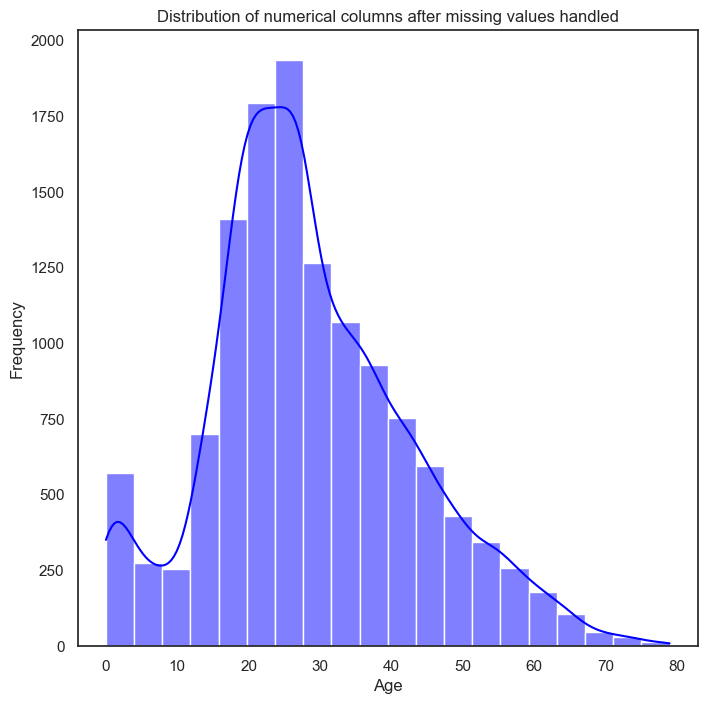

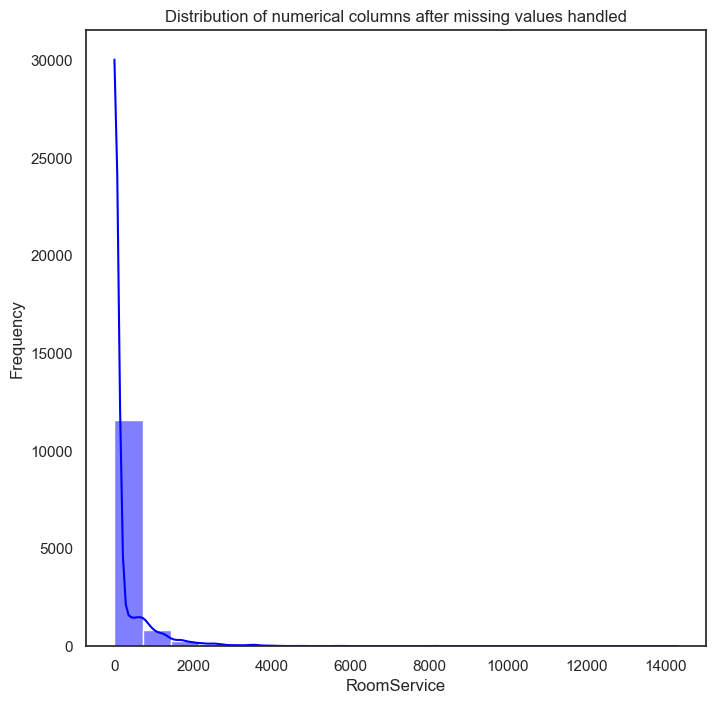

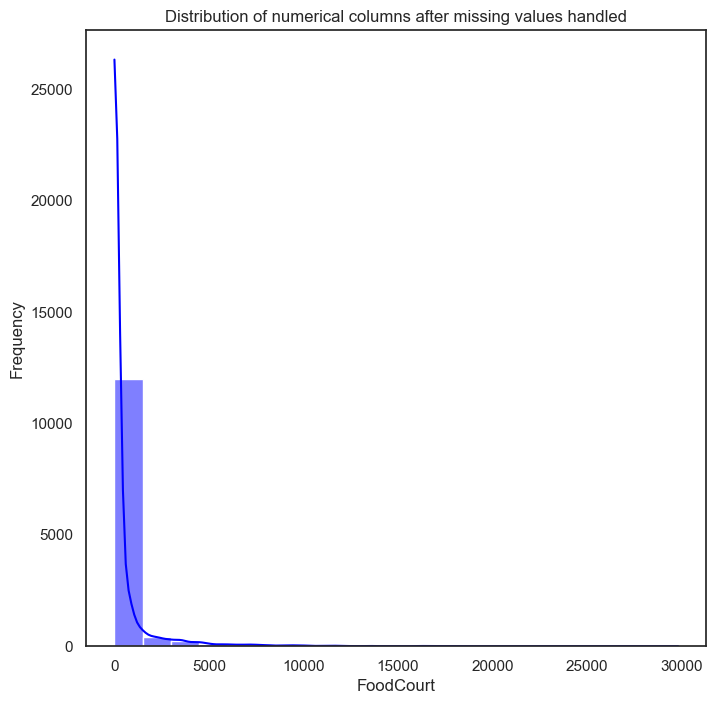

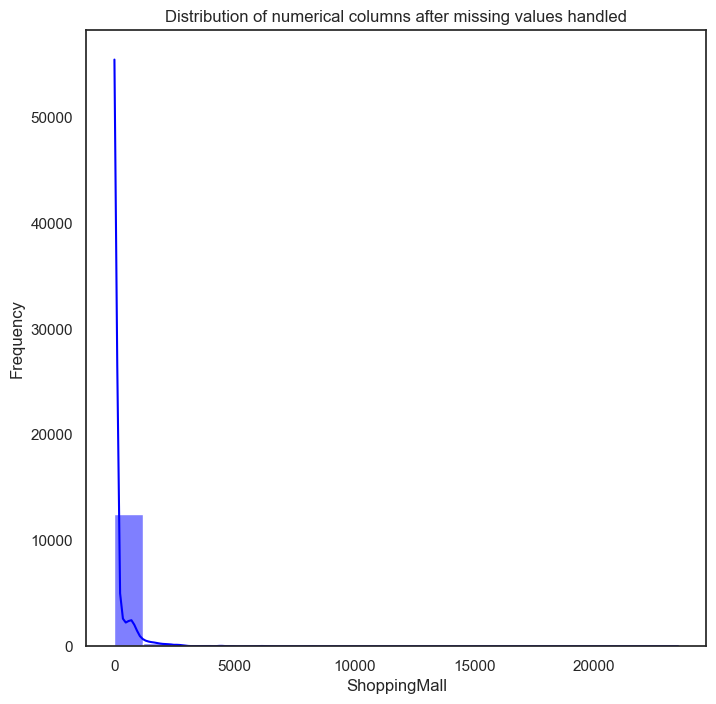

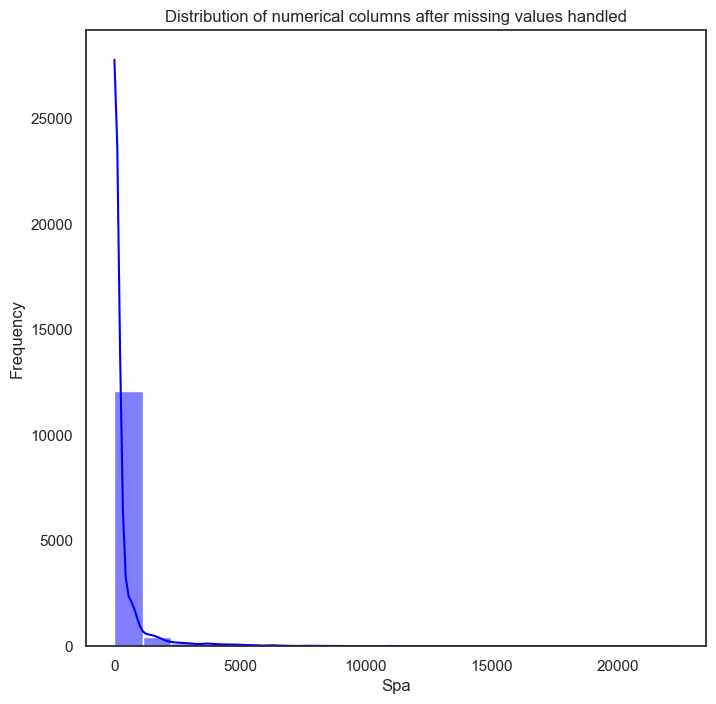

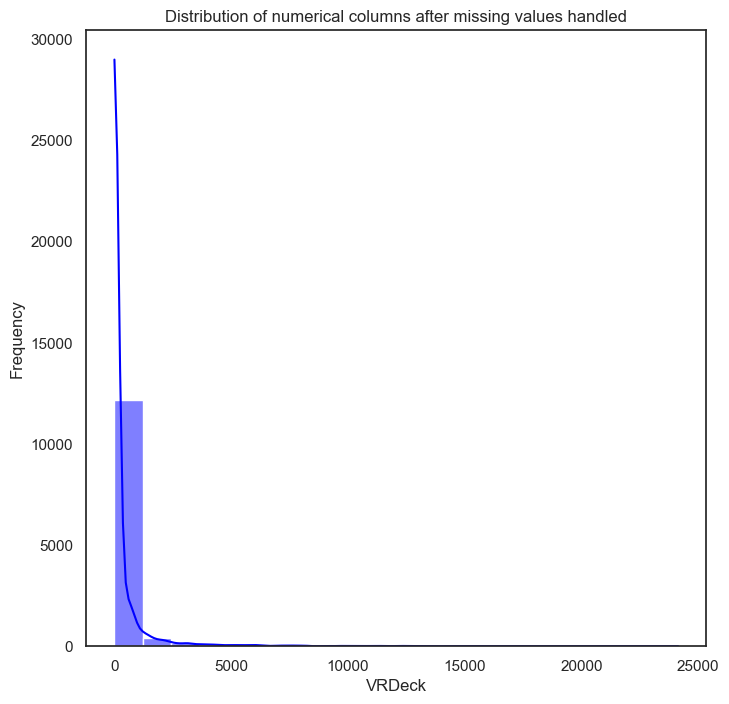

In [73]:
num_cols=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for i in num_cols:
    plt.figure(figsize=[8,8])
    sns.set_theme(style='white')
    sns.histplot(all_data[i],kde=True, bins=20, color='blue')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title('Distribution of numerical columns after missing values handled')
    plt.show()

Replaced null values with mode for categorical columns and median for the numerical columns

## 8. Analysis of distribution of categorical columns

In [74]:
for i in all_data.columns:
    if (all_data[i].dtype=='object') or (all_data[i].dtype=='bool'):
        print(all_data[i].value_counts(),'****\n', all_data[i].value_counts()/len(all_data[i])*100 )
        print("**********************")

Earth     7153
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64 ****
 Earth     55.150347
Europa    24.155744
Mars      20.693909
Name: HomePlanet, dtype: float64
**********************
False    8389
True     4581
Name: CryoSleep, dtype: int64 ****
 False    64.680031
True     35.319969
Name: CryoSleep, dtype: float64
**********************
TRAPPIST-1e      9145
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64 ****
 TRAPPIST-1e      70.508867
55 Cancri e      20.362375
PSO J318.5-22     9.128759
Name: Destination, dtype: float64
**********************
False    12697
True       273
Name: VIP, dtype: int64 ****
 False    97.895143
True      2.104857
Name: VIP, dtype: float64
**********************
train    8693
test     4277
Name: data, dtype: int64 ****
 train    67.023901
test     32.976099
Name: data, dtype: float64
**********************
F    4538
G    3781
E    1323
B    1141
C    1102
D     720
A     354
T      11
Name: Deck, dtype: int64 ****

## Above data represents the distribution of different categorical variables


VIP 12697 (~98%) passengers did not avail VIP services. Only 2% of passengers availed VIP Services.

Cryosleep 8389 (~65%) passengers are not put into suspended animation for the duration of the voyage. 4581 (35%) Passengers are elected to put in cryosleep and they are confined to their cabins

HomePlanet: 7153(~55%) passengers departed from Earth. 3133 (24%) passengers departed from Europa and 2684 (20%) passengers departed from Mars

Destination: 9145(~70%) passengers will be debarked to 'TRAPPIST-le' planet. 2641 (20%) passengers will be debarked to '55 Cancri e' planet. 1184 (9%) passengers will be debarked to 'PSO J318.5-22' planet

Cabin Deck: 4538 passengers are staying in F Deck, 3781 passengers are staying in G deck, 1323 passengers are staying in E deck, 1114 passengers are staying in B deck, 1102 passengers are staying in C deck, 720 passengers are staying in D deck, 354 passengers are staying in A deck, 11 passengers are staying in T deck, which accounts to around 73% passengers in F,G, E cabins and around 27% in other cabins.

Cabin Side: Total of 6680 (51.5%) passengers stay in Stayport side of cabin, 6290 (48.4%) passengers stay in Port side of the Cabin.

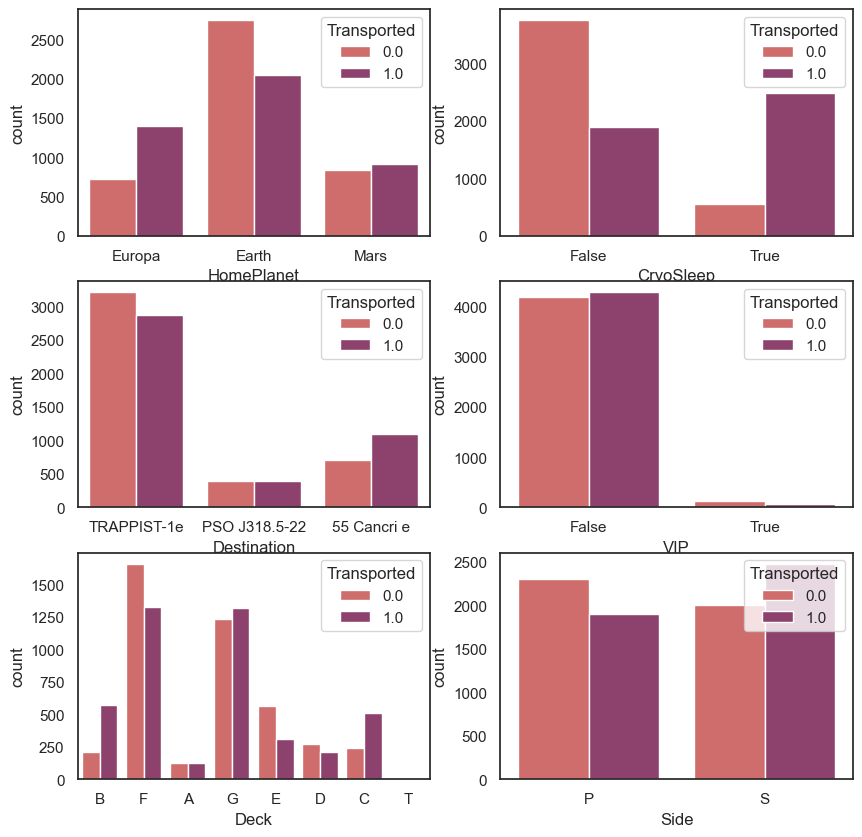

In [75]:
plt.figure(figsize=[10,10])
sns.set_theme(style='white')
plt.subplot(3,2,1)
sns.countplot(x='HomePlanet',hue='Transported',data=all_data, palette='flare')
plt.subplot(3,2,2)
sns.countplot(x='CryoSleep',hue='Transported',data=all_data, palette='flare')
#plt.legend(loc='best')
plt.subplot(3,2,3)
sns.countplot(x='Destination',hue='Transported',data=all_data, palette='flare')
plt.subplot(3,2,4)
sns.countplot(x='VIP',hue='Transported',data=all_data, palette='flare')
plt.subplot(3,2,5)
sns.countplot(x='Deck',hue='Transported',data=all_data, palette='flare')
plt.subplot(3,2,6)
sns.countplot(x='Side',hue='Transported',data=all_data, palette='flare')
plt.show()

From the above visual representation, we could infer the below:

-  Majority of the passengers departed from Earth followed by Europa and Mars. In comparison to all the three departure planets, the number of successfully transported passengers who departed from Earth are more. Within Europa, we could observe that % of successful Transportation is more than unsuccessful transportation
-  Vast number of Passengers who elected for Cryosleep successfully got transported and may be because, they were confined to their cabins
-  Most of the passsengers who chose debarking destination as '55 Cancri e' and 'PSO J318.5-22' planets transported successfully compared to 'TRAPPIST-1e planet'
-  Passengers who paid for special VIP service is very minimal and who paid for VIP are less likely survived.
-  F and G cabins have more number of passengers followed by E, B, C, D, A cabins. Only 11 passengers were in T cabin. Survival rate is more in B, G and C cabins.% of successful Transportation is less in F and E cabins 
-  Proportion of Passengers who stayed in the Starboard side, has high successful transporation rate, while who stayed in Port side had more of unsuccessful transportation

# 9. Finding the significant categorical variable using Anova Test

In [76]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
for i in all_data.columns:
    if all_data[i].dtype=='object' :
        print(i)
        model=ols('Transported ~ all_data[i]', data=all_data ).fit()
        anova_result=sm.stats.anova_lm(model, typ=2)
        print(anova_result)
        print("***\n")

HomePlanet
                  sum_sq      df           F        PR(>F)
all_data[i]    79.729425     2.0  165.483561  2.925562e-71
Residual     2093.406432  8690.0         NaN           NaN
***

Destination
                  sum_sq      df          F        PR(>F)
all_data[i]    26.389357     2.0  53.411876  8.809132e-24
Residual     2146.746499  8690.0        NaN           NaN
***

data
                  sum_sq      df            F  PR(>F)
all_data[i]  2204.864144     1.0  8818.905214     0.0
Residual     2173.135856  8692.0          NaN     NaN
***

Deck
                  sum_sq      df          F        PR(>F)
all_data[i]    97.338090     7.0  58.179443  6.064701e-82
Residual     2075.797767  8685.0        NaN           NaN
***

Side
                  sum_sq      df          F        PR(>F)
all_data[i]    22.342935     1.0  90.284121  2.617375e-21
Residual     2150.792921  8691.0        NaN           NaN
***



All categorical variables are significant

## 10. Feature Encoding

In [77]:
all_data['CryoSleep']=all_data['CryoSleep'].astype('int')
all_data['CryoSleep']

0       0
1       0
2       0
3       0
4       0
       ..
4272    1
4273    0
4274    1
4275    0
4276    1
Name: CryoSleep, Length: 12970, dtype: int32

In [78]:
all_data['VIP']=all_data['VIP'].astype('int')
all_data['VIP']

0       0
1       0
2       1
3       0
4       0
       ..
4272    0
4273    0
4274    0
4275    0
4276    0
Name: VIP, Length: 12970, dtype: int32

In [79]:
all_data=pd.get_dummies(all_data, columns=['HomePlanet', 'Destination', 'Side'], drop_first=True)

In [80]:
all_data

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,data,Deck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Side_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,train,B,1,0,0,1,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1.0,train,F,0,0,0,1,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0.0,train,A,1,0,0,1,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0.0,train,A,1,0,0,1,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1.0,train,F,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34.0,0,0.0,0.0,0.0,0.0,0.0,NaN,test,G,0,0,0,1,1
4273,0,42.0,0,0.0,847.0,17.0,10.0,144.0,NaN,test,F,0,0,0,1,1
4274,1,27.0,0,0.0,0.0,0.0,0.0,0.0,NaN,test,D,0,1,0,0,0
4275,0,27.0,0,0.0,2680.0,0.0,0.0,523.0,NaN,test,D,1,0,0,1,0


In [81]:
all_data['Deck']=all_data['Deck'].map({'A':1, 'B': 2, 'C': 3, 'D': 4, 'E':5, 'F':6, 'G':7, 'T':8})

In [82]:
all_data

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,data,Deck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Side_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,train,2,1,0,0,1,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1.0,train,6,0,0,0,1,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0.0,train,1,1,0,0,1,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0.0,train,1,1,0,0,1,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1.0,train,6,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34.0,0,0.0,0.0,0.0,0.0,0.0,NaN,test,7,0,0,0,1,1
4273,0,42.0,0,0.0,847.0,17.0,10.0,144.0,NaN,test,6,0,0,0,1,1
4274,1,27.0,0,0.0,0.0,0.0,0.0,0.0,NaN,test,4,0,1,0,0,0
4275,0,27.0,0,0.0,2680.0,0.0,0.0,523.0,NaN,test,4,1,0,0,1,0


In [83]:
all_data['Total_Charges']=all_data['RoomService']+all_data['FoodCourt']+all_data['ShoppingMall']+all_data['Spa']+all_data['VRDeck']

In [84]:
all_data=all_data.drop(['RoomService', 'FoodCourt', 'ShoppingMall','Spa', 'VRDeck'],axis=1)

In [85]:
all_data

,CryoSleep,Age,VIP,Transported,data,Deck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Side_S,Total_Charges
0,0,39.0,0,0.0,train,2,1,0,0,1,0,0.0
1,0,24.0,0,1.0,train,6,0,0,0,1,1,736.0
2,0,58.0,1,0.0,train,1,1,0,0,1,1,10383.0
3,0,33.0,0,0.0,train,1,1,0,0,1,1,5176.0
4,0,16.0,0,1.0,train,6,0,0,0,1,1,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34.0,0,NaN,test,7,0,0,0,1,1,0.0
4273,0,42.0,0,NaN,test,6,0,0,0,1,1,1018.0
4274,1,27.0,0,NaN,test,4,0,1,0,0,0,0.0
4275,0,27.0,0,NaN,test,4,1,0,0,1,0,3203.0


## 11. Imbalance Checks

In [86]:
temp=all_data['Transported'].value_counts()
temp_df=pd.DataFrame({'Transported':temp.index, 'Values':temp.values})

Axes(0.125,0.11;0.775x0.77)


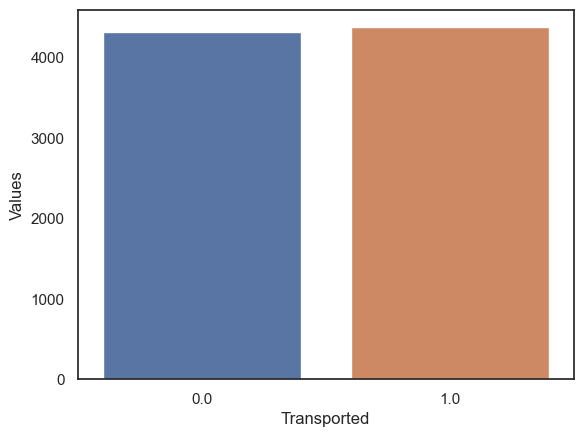

In [87]:
print(sns.barplot(x='Transported', y='Values', data=temp_df))
plt.show()

Dataset is balanced

## 12. Generating heatmap to see correlation

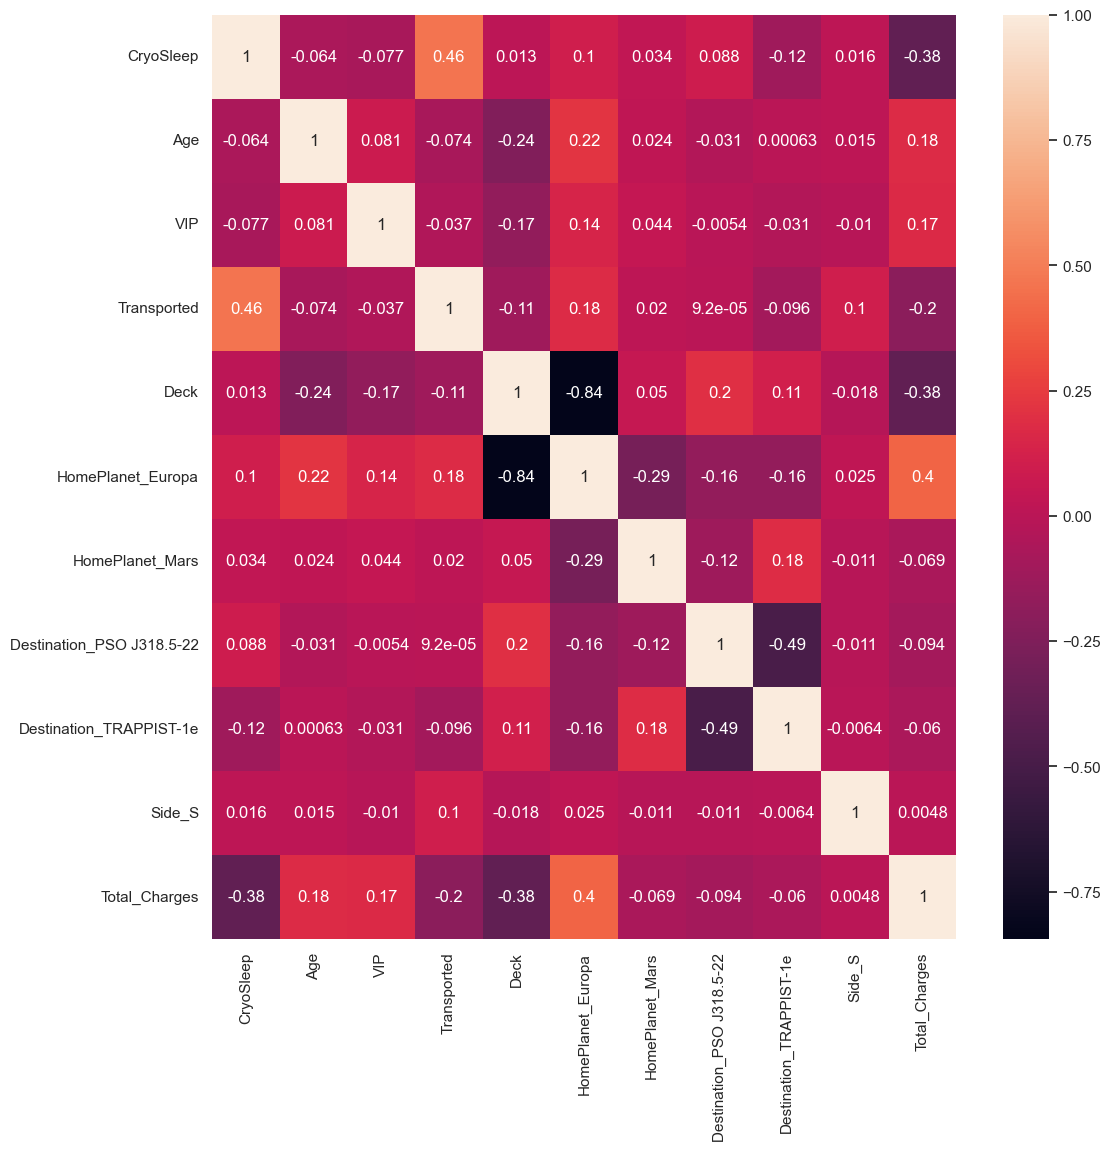

In [88]:
plt.figure(figsize=[12,12])
sns.heatmap(all_data.corr(), annot=True)
plt.show()

In [89]:
all_data.corr()

,CryoSleep,Age,VIP,Transported,Deck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Side_S,Total_Charges
CryoSleep,1.000000,-0.064196,-0.076891,0.460132,0.013106,0.100785,0.034249,0.087826,-0.115680,0.016018,-0.377273
Age,-0.064196,1.000000,0.080928,-0.074233,-0.240843,0.215878,0.023606,-0.030990,0.000626,0.015133,0.177784
VIP,-0.076891,0.080928,1.000000,-0.037261,-0.169288,0.139359,0.044423,-0.005448,-0.031201,-0.010322,0.165179
Transported,0.460132,-0.074233,-0.037261,1.000000,-0.114941,0.176916,0.019544,0.000092,-0.096319,0.101397,-0.199514
Deck,0.013106,-0.240843,-0.169288,-0.114941,1.000000,-0.843938,0.050227,0.199191,0.110639,-0.018396,-0.378700
HomePlanet_Europa,0.100785,0.215878,0.139359,0.176916,-0.843938,1.000000,-0.288282,-0.160735,-0.163951,0.025012,0.400467
HomePlanet_Mars,0.034249,0.023606,0.044423,0.019544,0.050227,-0.288282,1.000000,-0.117632,0.179694,-0.010797,-0.068906
Destination_PSO J318.5-22,0.087826,-0.030990,-0.005448,0.000092,0.199191,-0.160735,-0.117632,1.000000,-0.490082,-0.010606,-0.093571
Destination_TRAPPIST-1e,-0.115680,0.000626,-0.031201,-0.096319,0.110639,-0.163951,0.179694,-0.490082,1.000000,-0.006425,-0.060366
Side_S,0.016018,0.015133,-0.010322,0.101397,-0.018396,0.025012,-0.010797,-0.010606,-0.006425,1.000000,0.004835


The above output on correlation indicates that there are positive and negative correlations among the variables



- Cryosleep and Total charges - These variables have moderately negative correlation of -0.377273 which indicates that passsengers in Cryosleep did not spend on luxury amenities except room service as they were confined to their cabins

- HomePlanet Europa and Total charges- These variables have moderately positive correlation of 0.400467, which indicates that - the passengers who had departed from Home Planet Europa comparatively spent more on luxury amenities

- Deck and HomePlanet_Europa - These variables have strong negative correlation of -0.843938, which indicates that the passengers who departed from Europa are seated across all the cabin decks.

- Other variables such as Age, VIP, Deck, Homeplanet, Destination, Side are weakly correlated

## Splitting Train and Test Dataset

In [90]:
train=all_data[all_data['data']=='train']
test=all_data[all_data['data']=='test']

In [91]:
print(all_data.shape)
print(train.shape)
print(test.shape)

(12970, 12)
(8693, 12)
(4277, 12)


In [92]:
train.isnull().sum()

CryoSleep                    0
Age                          0
VIP                          0
Transported                  0
data                         0
Deck                         0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Side_S                       0
Total_Charges                0
dtype: int64

In [93]:
test.isnull().sum()

CryoSleep                       0
Age                             0
VIP                             0
Transported                  4277
data                            0
Deck                            0
HomePlanet_Europa               0
HomePlanet_Mars                 0
Destination_PSO J318.5-22       0
Destination_TRAPPIST-1e         0
Side_S                          0
Total_Charges                   0
dtype: int64

In [94]:
train=train.drop('data', axis=1)

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int32  
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   int32  
 3   Transported                8693 non-null   float64
 4   Deck                       8693 non-null   int64  
 5   HomePlanet_Europa          8693 non-null   uint8  
 6   HomePlanet_Mars            8693 non-null   uint8  
 7   Destination_PSO J318.5-22  8693 non-null   uint8  
 8   Destination_TRAPPIST-1e    8693 non-null   uint8  
 9   Side_S                     8693 non-null   uint8  
 10  Total_Charges              8693 non-null   float64
dtypes: float64(3), int32(2), int64(1), uint8(5)
memory usage: 449.9 KB


In [96]:
test=test.drop(['Transported', 'data'], axis=1)

In [97]:
y=train[['Transported']]
x=train.drop('Transported', axis=1)

In [98]:
y.head()

,Transported
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0


In [99]:
x.head()

,CryoSleep,Age,VIP,Deck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Side_S,Total_Charges
0,0,39.0,0,2,1,0,0,1,0,0.0
1,0,24.0,0,6,0,0,0,1,1,736.0
2,0,58.0,1,1,1,0,0,1,1,10383.0
3,0,33.0,0,1,1,0,0,1,1,5176.0
4,0,16.0,0,6,0,0,0,1,1,1091.0


## Feature Scaling

In [100]:
feature_names=x.columns.tolist()
feature_names

['CryoSleep',
 'Age',
 'VIP',
 'Deck',
 'HomePlanet_Europa',
 'HomePlanet_Mars',
 'Destination_PSO J318.5-22',
 'Destination_TRAPPIST-1e',
 'Side_S',
 'Total_Charges']

In [101]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

In [102]:
x_scaler=pd.DataFrame(x_scaler, columns=feature_names)

In [103]:
x_scaler.head()

,CryoSleep,Age,VIP,Deck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Side_S,Total_Charges
0,-0.73277,0.711945,-0.153063,-1.886321,1.754795,-0.503664,-0.317487,0.652521,-1.032865,-0.514066
1,-0.73277,-0.334037,-0.153063,0.385470,-0.569867,-0.503664,-0.317487,0.652521,0.968181,-0.251479
2,-0.73277,2.036857,6.533255,-2.454269,1.754795,-0.503664,-0.317487,0.652521,0.968181,3.190333
3,-0.73277,0.293552,-0.153063,-2.454269,1.754795,-0.503664,-0.317487,0.652521,0.968181,1.332604
4,-0.73277,-0.891895,-0.153063,0.385470,-0.569867,-0.503664,-0.317487,0.652521,0.968181,-0.124824


In [104]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_scaler,y, test_size=0.25, random_state=100, stratify=y)

## Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(max_iter=5000)
logit_model.fit(x_train,y_train)

LogisticRegression(max_iter=5000)

In [106]:
y_pred_train=logit_model.predict(x_train)
y_pred_test=logit_model.predict(x_test)

In [107]:
feature_coefficients=logit_model.coef_[0]
feature_coefficients

array([ 0.8946767 , -0.18149498, -0.04454774, -0.09144224,  0.53295716,
        0.1479337 , -0.11074314, -0.16920919,  0.22848894, -0.4022984 ])

In [108]:
coefficients=pd.DataFrame({'Features':x_train.columns, 'Coefficients':feature_coefficients})
coefficients

,Features,Coefficients
0,CryoSleep,0.894677
1,Age,-0.181495
2,VIP,-0.044548
3,Deck,-0.091442
4,HomePlanet_Europa,0.532957
5,HomePlanet_Mars,0.147934
6,Destination_PSO J318.5-22,-0.110743
7,Destination_TRAPPIST-1e,-0.169209
8,Side_S,0.228489
9,Total_Charges,-0.402298


### Based on the feature coefficients,we can interpret the impact on logistic regression model predictions: The coefficients show how each feature influences the likelihood of the survival

CryoSleep: A coefficient of approximately 0.895 indicates that passengers who were in CryoSleep have a higher likelihood of survival.

Age: A coefficient of approximately -0.181 suggests that younger passengers are more likely to survive than older ones.

VIP: A coefficient of approximately -0.045 indicates that VIP passengers are less likely to survive compared to non-VIP passengers.

Deck: A coefficient of approximately -0.091 implies that passengers on certain decks may have a slightly lower likelihood of survival.

HomePlanet_Europa and HomePlanet_Mars: Coefficients of approximately 0.533 and 0.148, respectively, indicate that passengers from Europa and Mars are more likely to survive compared to passengers from other home planets.

Destination_PSO J318.5-22 and Destination_TRAPPIST-1e: Coefficients of approximately -0.111 and -0.169, respectively, suggest that passengers destined for these locations may have a slightly lower likelihood of survival.

Side_S: A coefficient of approximately 0.228 suggests that passengers on side S are more likely to survive compared to passengers on the other side.

Total_Charges: A coefficient of approximately -0.402 indicates that higher total charges are associated with a lower likelihood of survival.

## Evaluate the model

In [109]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [110]:
print(confusion_matrix(y_train, y_pred_train))
print(confusion_matrix(y_test, y_pred_test))

[[2621  615]
 [1181 2102]]
[[867 212]
 [373 722]]


In [111]:
print(classification_report(y_train,y_pred_train))
print("****")
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.69      0.81      0.74      3236
         1.0       0.77      0.64      0.70      3283

    accuracy                           0.72      6519
   macro avg       0.73      0.73      0.72      6519
weighted avg       0.73      0.72      0.72      6519

****
              precision    recall  f1-score   support

         0.0       0.70      0.80      0.75      1079
         1.0       0.77      0.66      0.71      1095

    accuracy                           0.73      2174
   macro avg       0.74      0.73      0.73      2174
weighted avg       0.74      0.73      0.73      2174



In [112]:
print(accuracy_score(y_train,y_pred_train))
print("****")
print(accuracy_score(y_test,y_pred_test))

0.7244976223347139
****
0.7309107635694572


## Cross Validation

In [113]:
from sklearn.model_selection import cross_val_score
training_accuracy=cross_val_score(logit_model,x_train,y_train, cv=20)
testing_accuracy=cross_val_score(logit_model, x_test,y_test, cv=20)
print("Training Accuracy", training_accuracy)
print("*********************************************")
print("Training Mean Accuracy", training_accuracy.mean())
print("Training Max Accuracy", training_accuracy.max())
print("******************")
print("******************")
print("Testing Accuracy", testing_accuracy)
print("*********************************************")
print("Testing Mean Accuracy", testing_accuracy.mean())
print("Testing Max Accuracy", testing_accuracy.max())

Training Accuracy [0.71472393 0.74233129 0.73006135 0.73619632 0.73312883 0.74233129
 0.75153374 0.71472393 0.69325153 0.73312883 0.75153374 0.7208589
 0.67791411 0.73312883 0.71472393 0.72699387 0.72392638 0.69631902
 0.72392638 0.72615385]
*********************************************
Training Mean Accuracy 0.7243445021236432
Training Max Accuracy 0.7515337423312883
******************
******************
Testing Accuracy [0.71559633 0.65137615 0.7706422  0.7706422  0.76146789 0.70642202
 0.68807339 0.72477064 0.74311927 0.78899083 0.73394495 0.71559633
 0.70642202 0.7706422  0.76851852 0.7037037  0.75925926 0.76851852
 0.65740741 0.74074074]
*********************************************
Testing Mean Accuracy 0.7322927285083249
Testing Max Accuracy 0.7889908256880734


## ROC and AUC

In [114]:
from sklearn.metrics import roc_auc_score
logistic_roc_auc=roc_auc_score(y_test, y_pred_test)
logistic_roc_auc

0.7314412550095006

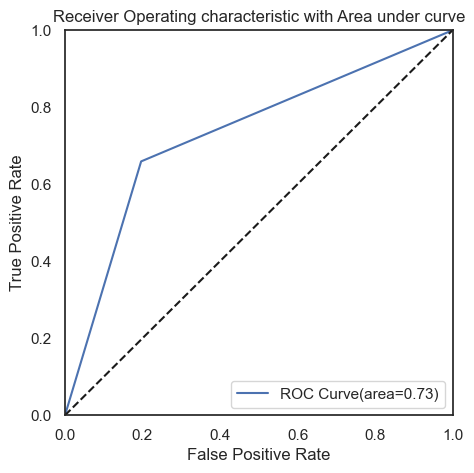

In [115]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_test, y_pred_test)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC Curve(area=%0.2f)' % logistic_roc_auc)
plt.plot([0,1],[0,1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating characteristic with Area under curve")
plt.legend(loc='lower right')
plt.show()

## Predicting the given test data

In [118]:
final_result=logit_model.predict(test)

In [117]:
final_result1=pd.concat([test,pd.DataFrame(final_result)], axis=1)

In [119]:
final_result1=final_result1.rename(columns={0: "Transported"})

In [120]:
final_result2=final_result1[['Transported']]

In [122]:
final_result2=final_result2.astype('bool')

In [123]:
final_result2

,Transported
0,False
1,False
2,False
3,False
4,False
...,...
4272,False
4273,False
4274,False
4275,False


In [124]:
spaceship_titanic_sub=pd.read_csv("spaceship_titanic_test.csv")

In [125]:
spaceship_titanic_submission=pd.concat([spaceship_titanic_sub, final_result2], axis=1)

In [126]:
spaceship_titanic_submission

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,False
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,False
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,False
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,False
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,False
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,False
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,False
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,False


In [127]:
spaceship_titanic_submission.to_csv('Final_Report_Spaceship_Titanic.csv')

## Conclusion:

Below are the valuable insights that I gained from Spaceship Titanic Dataset.

Spaceship Titanic training dataset contains 8693x15 records and test dataset contains 4277x14 records.

Data Quality: Ensured dataset's integrity by checking for duplicates, and no duplicate records were found.

Feature Engineering:I split the "Cabin" feature into "Deck Num" and "Deck Side" features, which allowed me to extract additional information relevant to passenger transportation.

Preprocessing: I handled missing values using appropriate imputation techniques, such as median for numerical columns and mode for categorical columns, ensuring data completeness. Label Encoding and Onehot Encoder techniques were used to handle encoding. Outlier treatment was not done as outliers does not impact logistic regression model. Data is balanced so no imbalance treatment done.

Distribution Analysis: Analyzed the distribution of numerical and categorical columns, which provided valuable insights into the dataset's characteristics.

Significant Variables: An Anova Test was performed to identify significant categorical variables, all of which were found to be impactful in predicting passenger transportation.

Model Performance: My logistic regression model achieved promising results, with a training accuracy of 72.4% and a test accuracy of 73.0%. The precision, recall, and F1-score metrics were well-balanced, indicating consistent performance.

Cross-Validation: To validate the model's generalization performance, I performed k-fold cross-validation. The model demonstrated stability with mean accuracy of 0.72 in training data and 0.73 in testing data.

ROC AUC Score: My model achieved a ROC AUC score of 0.72, which indicates its ability to distinguish between positive and negative instances reasonably well.

## Next steps include applying other algorithms to explore potential improvements in model performance.